# **ADNI dataset**

**The Alzheimer's Disease Neuroimaging Initiative (ADNI)** is a longitudinal multicenter study designed to develop clinical, imaging, genetic, and biochemical biomarkers for the early detection and tracking of Alzheimer's disease (AD).

[Link to dataset](https://ida.loni.usc.edu/login.jsp?project=ADNI)    
[Link to help page](http://adni.loni.usc.edu/support/)

### Data
  - Study data
      - Assessments
      - Biospecimen
      - Curated data cuts
  - In the ADNI subject IDs of the form 123_S_5678, the last 4 digits correspond to the roster ID (RID)
  - Images data:
      - **1.5T scans**: 
        - smaller size
      - **3T scans**: 
        - bigger size

<div>
<img src="pictures/adni_1.5T.png" width="800"/>
</div>
<div>
<img src="pictures/adni_3T.png" width="800"/>
</div>

### Import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Load data

In [29]:
comparison = pd.read_csv("ADNI_database/ADNI_DIAN_Comparison_Data_20190425.csv")
comparison.head()

In [159]:
n_rows = comparison.shape[0]
n_columns = comparison.shape[1]
n_patients = comparison["RID"].unique().shape[0]

print(f"Dataset has {n_rows} rows and {n_columns} columns.")
print(f"Dataset contains information about {n_patients} unique patients.")

Dataset has 3225 rows and 130 columns.
Dataset contains information about 571 unique patients.


### Ancestry analysis

In [169]:
# Group dataframe by unique users
df_ancestry = comparison.groupby("RID")["ADgroup","MOMDEM", "DADDEM"].mean()

<ipython-input-169-1bf7b6dd0186>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ancestry = comparison.groupby("RID")["ADgroup","MOMDEM", "DADDEM"].mean()


In [170]:
# Add new column with the sum of ancestry disease
df_ancestry["Ancestry"] = df_ancestry["MOMDEM"] + df_ancestry["DADDEM"]

In [ ]:
# Remove rows with missing information about ancestry
df_ancestry = df_ancestry.drop(grouped[grouped.antecedente > 2.0].index, inplace=True)

In [171]:
df_ancestry["Ancestry"].value_counts()

0.0     251
1.0     239
2.0      35
9.0      20
10.0     13
18.0      7
Name: Ancestry, dtype: int64

In [198]:
comparison["ALCDEM"].value_counts()

0    3225
Name: ALCDEM, dtype: int64

In [195]:
comparison[comparison["PARK"] == 1]

,visit,visitage,cdrglob,visit_date,CSFDATE,EDUC,MRI_SCANDATE,FLUF,WORDIM,LOGIMEM,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILB,TRAILBRR,WAIS,MEMUNITS,BOSTON,WORDDEL,MR_TOTV_WMHYPOINTENSITIES,MR_TOTV_INTRACRANIAL,MR_TOTV_HIPPOCAMPUS,FDG_fSUVR_rsf_TOT_CTX_PRECUNEUS,FDG_fSUVR_rsf_TOT_HIPPOCAMPUS,FDG_fSUVR_rsf_TOT_CORTMEAN,PIB_fSUVR_rsf_TOT_CTX_PRECUNEUS,PIB_fSUVR_rsf_TOT_HIPPOCAMPUS,PIB_fSUVR_rsf_TOT_CORTMEAN,BIRTHMO,BIRTHYR,HISPANIC,RACE,PRIMLANG,MARISTAT,HANDED,MOMDEM,MOMAUTO,DADDEM,DADAUTO,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CDRSUM,GDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,DECSUB,VASC,ALCDEM,FTD,PPAPH,PSP,CORT,HUNT,PRION,DEP,PARK,HYCEPH,COGOTH,COGOTHX,gender,CSF_ELC_AB42,CSF_ELC_ptau,CSF_ELC_tau,CSF_ELC_AB40,CSF_ELC_AB4240,MSP_AB38,MSP_AB40,MSP_AB42,csf_date_bl,mri_date_bl,csf_cdr_bl,mri_cdr_bl,csf_cdrsb_bl,mri_cdrsb_bl,visit_date_bl,MR_TOTT_PRECUNEUS,last_visit_date,time_cognitive_followup,time_csf_followup,time_mri_followup,cdr_baseline,group_CSF,group_MRI,cohort,RID,pet_type,PiB_mSUVR_TOT_PRECUNEUS,PiB_mSUVR_TOT_CORTMEAN,FDG_mSUVR_TOT_PRECUNEUS,FDG_mSUVR_TOT_CORTMEAN,AV45_fSUVR_rsf_TOT_CTX_PRECUNEUS,AV45_fSUVR_rsf_TOT_HIPPOCAMPUS,AV45_fSUVR_rsf_TOT_CORTMEAN,AV45_mSUVR_TOT_PRECUNEUS,AV45_mSUVR_TOT_CORTMEAN,pet_date_bl,pet_cdr_bl,pet_cdrsb_bl,time_pet_followup,ADgroup,group_PET,PET_scandate,origin,DIAN_ID,DIAN_APOE,DIAN_GROUP,DIAN_CDRSB_BL,DIAN_years_bl,DIAN_MMSE,nEYO
521,v06,74.36776,0.5,4-Apr-16,NaN,18,NaN,12.0,7.0,14.0,NaN,NaN,NaN,NaN,19.0,NaN,82.0,0.0,300.0,6.0,NaN,15.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1941,0,1,1,5,2,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Mar-11,3-Feb-11,0.5,0.5,0.5,0.5,11-Mar-11,NaN,4-Apr-16,5.06779,5.015735,5.16642,0.5,4,4,0,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-Mar-11,0.5,0.5,5.012995,0,4,NaN,ADNI,119,34.0,2,0.5,5.06776,26.0,2.080767


In [174]:
df_ancestry["ADgroup"].value_counts()

1.000000    414
0.000000     23
0.666667     14
0.833333     13
0.857143     12
0.500000     11
0.800000     11
0.333333     10
0.750000      6
0.181818      5
0.714286      4
0.200000      4
0.400000      3
0.600000      3
0.250000      3
0.545455      3
0.900000      3
0.555556      2
0.875000      2
0.272727      2
0.769231      2
0.166667      2
0.454545      2
0.142857      1
0.888889      1
0.916667      1
0.615385      1
0.909091      1
0.636364      1
0.111111      1
0.444444      1
0.300000      1
0.416667      1
0.777778      1
0.363636      1
0.700000      1
0.818182      1
0.571429      1
0.090909      1
0.428571      1
Name: ADgroup, dtype: int64

In [42]:
test[["visit","visitage","ADgroup","nEYO","MOMDEM", "DADDEM"]]

,visit,visitage,ADgroup,nEYO,MOMDEM,DADDEM
0,v00,76.30000,0,-2.091718,0.0,0.0
1,v01,76.78460,0,-1.607118,0.0,0.0
2,v02,77.32396,0,-1.067762,0.0,0.0
3,v03,78.39172,0,0.000000,0.0,0.0
4,v04,79.38830,0,0.996578,0.0,0.0


In [45]:
comparison.groupby("RID")["MOMDEM", "DADDEM"].mean()

<ipython-input-45-0611da2b9137>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comparison.groupby("RID")["MOMDEM", "DADDEM"].mean()


,MOMDEM,DADDEM
RID,,
42,0.0,0.0
47,1.0,0.0
51,1.0,0.0
56,0.0,0.0
57,1.0,1.0
...,...,...
5263,0.0,0.0
5273,0.0,0.0
5275,0.0,0.0


In [184]:
test = comparison.groupby("RID")["ADgroup"]

In [186]:
test.describe()

,count,mean,std,min,25%,50%,75%,max
RID,,,,,,,,
42,11.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
47,9.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
51,11.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
56,11.0,0.090909,0.301511,0.0,0.00,0.0,0.00,1.0
57,6.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
5263,4.0,0.250000,0.500000,0.0,0.00,0.0,0.25,1.0
5273,5.0,0.800000,0.447214,0.0,1.00,1.0,1.00,1.0
5275,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [120]:
comparison["ADgroup"].value_counts()

1    2688
0     537
Name: ADgroup, dtype: int64

In [125]:
df_ad = comparison[comparison["ADgroup"] == 1]
df_hc = comparison[comparison["ADgroup"] == 0]

In [ ]:
df_ad = [["RID","visit","visitage","ADgroup","nEYO","MOMDEM", "DADDEM"]]
df_hc = [["RID","visit","visitage","ADgroup","nEYO","MOMDEM", "DADDEM"]]

In [55]:
grouped_ad = df_ad.groupby("RID")[["MOMDEM", "DADDEM"]].mean()
grouped_ad 

In [126]:
grouped_hc = df_hc.groupby("RID")[["MOMDEM", "DADDEM"]].mean()
grouped_hc

,MOMDEM,DADDEM
RID,,
47,1.0,0.0
56,0.0,0.0
61,0.0,0.0
101,1.0,0.0
106,1.0,0.0
...,...,...
5227,1.0,0.0
5263,0.0,0.0
5273,0.0,0.0


In [163]:
grouped_ad

NameError: name 'grouped_ad' is not defined

In [127]:
grouped["antecedente"] = grouped["MOMDEM"] + grouped["DADDEM"]
grouped_hc["antecedente"] = grouped_hc["MOMDEM"] + grouped_hc["DADDEM"]

In [128]:
grouped_hc["antecedente"].value_counts()

0.0     70
1.0     67
10.0     6
9.0      6
2.0      6
Name: antecedente, dtype: int64

In [78]:
grouped.drop(grouped[grouped.antecedente > 2.0].index, inplace=True)

In [132]:
grouped_hc.drop(grouped_hc[grouped_hc.antecedente > 2.0].index, inplace=True)

In [117]:
def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

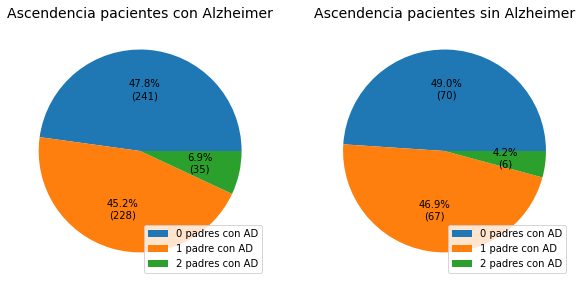

In [140]:
data_ad = grouped["antecedente"].value_counts()
data_hc = grouped_hc["antecedente"].value_counts()
fig, axes = plt.subplots(1,2,figsize=(10,8))

axes[0].pie(x = data_ad, autopct = lambda pct: func(pct, data))
axes[0].set_title("Ascendencia pacientes con Alzheimer", fontsize = 14);

axes[1].pie(x = data_hc, autopct = lambda pct: func(pct, data_hc))
axes[1].set_title("Ascendencia pacientes sin Alzheimer", fontsize = 14);

axes[0].legend(["0 padres con AD","1 padre con AD","2 padres con AD"],loc = "lower right");
axes[1].legend(["0 padres con AD","1 padre con AD","2 padres con AD"],loc = "lower right");

In [71]:
grouped[grouped["antecedente"] == 10.0]

,MOMDEM,DADDEM,antecedente
RID,,,
4115,1.0,9.0,10.0
4189,1.0,9.0,10.0
4337,1.0,9.0,10.0
4346,1.0,9.0,10.0
4402,1.0,9.0,10.0
4447,1.0,9.0,10.0
4502,1.0,9.0,10.0
4597,1.0,9.0,10.0
4624,9.0,1.0,10.0


In [44]:
comparison[["RID","visit","visitage","ADgroup","nEYO","MOMDEM", "DADDEM"]]

,RID,visit,visitage,ADgroup,nEYO,MOMDEM,DADDEM
0,1002,v00,76.30000,0,-2.091718,0.0,0.0
1,1002,v01,76.78460,0,-1.607118,0.0,0.0
2,1002,v02,77.32396,0,-1.067762,0.0,0.0
3,1002,v03,78.39172,0,0.000000,0.0,0.0
4,1002,v04,79.38830,0,0.996578,0.0,0.0
...,...,...,...,...,...,...,...
3220,997,v03,81.93320,1,5.930899,1.0,0.0
3221,997,v04,82.45065,1,6.448349,1.0,0.0
3222,997,v05,83.42806,1,7.425759,1.0,0.0
3223,997,v06,84.41643,1,8.414129,1.0,0.0


In [31]:
comparison["ADgroup"].value_counts()

1    2688
0     537
Name: ADgroup, dtype: int64

In [190]:
test

In [194]:
for subject, group in test:
    print(subject)
    print(np.mean(group))

42
1.0
47
0.0
51
1.0
56
0.09090909090909091
57
1.0
61
0.3333333333333333
101
0.9
106
0.5
107
0.7
112
0.6153846153846154
123
0.4166666666666667
126
1.0
128
1.0
135
0.6666666666666666
142
1.0
150
1.0
155
1.0
160
1.0
166
0.5454545454545454
171
0.0
173
0.1111111111111111
188
0.6666666666666666
200
0.6666666666666666
214
1.0
216
1.0
222
1.0
223
0.8
225
1.0
227
1.0
230
0.5555555555555556
258
0.8333333333333334
259
0.16666666666666666
262
0.0
266
1.0
269
1.0
276
0.7692307692307693
285
0.0
289
0.5555555555555556
292
1.0
293
1.0
294
1.0
307
1.0
331
1.0
344
1.0
352
0.0
361
1.0
376
1.0
378
1.0
400
1.0
408
0.8333333333333334
420
0.45454545454545453
448
1.0
454
0.18181818181818182
467
0.6363636363636364
479
0.0
545
0.2727272727272727
546
0.9090909090909091
547
1.0
549
1.0
552
0.5454545454545454
555
0.5454545454545454
566
1.0
572
1.0
602
0.3333333333333333
608
0.5
626
1.0
627
1.0
644
1.0
658
1.0
667
1.0
671
1.0
675
1.0
680
0.2727272727272727
682
1.0
698
1.0
702
1.0
709
1.0
722
0.25
729
0.9
741
0.181

### GENETIC DATA

In [201]:
genetic_dict = pd.read_csv("ADNI_database/genetic/DESIKANLAB_DICT.csv")
genetic_dict

,ID,FLDNAME,TBLNAME,CRFNAME,QUESTION,TEXT,STATUS,DEPRULE,TYPE,LENGTH,DECIML,RANGEVAL,RANGESQL,RANGEPRL,UNITS,CODE,NOTES,OBJID,COLID,RANGEJSCPT,NAVJSCPT,FTYPE,TAB,DE,MC,VISIBLE,LOGVISIBLE,MTBLNAME,SUBTBLNAME,POPJSCPT,GRID,DEF,update_stamp
0,NaN,RID,DESIKANLAB,Desikan Lab Polygenic Hazard Score (PHS),-4,Participant roster ID,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,The 4 digit roster ID (RID) should be used to ...,-4,NaN,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2018-08-09 15:39:55.0
1,NaN,USERDATE,DESIKANLAB,Desikan Lab Polygenic Hazard Score (PHS),-4,Date record created,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,NaN,-4,NaN,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2018-08-09 15:39:55.0
2,NaN,PHS,DESIKANLAB,Desikan Lab Polygenic Hazard Score (PHS),-4,Polygenic Hazard Score,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,NaN,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2018-08-09 15:39:55.0
3,NaN,CIR,DESIKANLAB,Desikan Lab Polygenic Hazard Score (PHS),-4,Cummulative Incidence Rate,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,NaN,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2018-08-09 15:39:55.0


In [202]:
genetic_score = genetic_dict = pd.read_csv("ADNI_database/genetic/DESIKANLAB.csv")
genetic_score.head()

,RID,USERDATE,PHS,CIR,update_stamp
0,2,2018-07-30,-0.096111,0.040873,2018-08-09 15:40:26.0
1,3,2018-07-30,0.414711,0.187496,2018-08-09 15:40:26.0
2,5,2018-07-30,-0.373703,0.030966,2018-08-09 15:40:26.0
3,6,2018-07-30,-0.105310,0.096553,2018-08-09 15:40:26.0
4,8,2018-07-30,-1.080340,0.074541,2018-08-09 15:40:26.0


In [205]:
len(genetic_score["RID"].unique())

1520

In [206]:
genetic_score.shape

(1520, 5)